In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load data
df = pd.read_excel('/Manufacturing_Line_Productivity.xlsx')
data_dict = pd.read_csv('/data_dictionary.csv')


In [71]:
print("Initial Data Preview:")
df.head()

Initial Data Preview:


,Date,Product,Batch,Operator,Start Time,End Time
0,2024-08-29,OR-600,422111,Mac,2024-08-29 11:50:00,2025-03-11 14:05:00
1,2024-08-29,LE-600,422112,Mac,2024-08-29 14:05:00,2025-03-11 15:45:00
2,2024-08-29,LE-600,422113,Mac,2024-08-29 15:45:00,2025-03-11 17:35:00
3,2024-08-29,LE-600,422114,Mac,2024-08-29 17:35:00,2025-03-11 19:15:00
4,2024-08-29,LE-600,422115,Charlie,2024-08-29 19:15:00,2025-03-11 20:39:00


In [72]:
print("\n Data Info:")
df.info()


 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        38 non-null     datetime64[ns]
 1   Product     38 non-null     object        
 2   Batch       38 non-null     int64         
 3   Operator    38 non-null     object        
 4   Start Time  38 non-null     datetime64[ns]
 5   End Time    38 non-null     datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(2)
memory usage: 1.9+ KB


In [73]:
print("\n Missing Values:")
df.isnull().sum()


 Missing Values:


,0
Date,0
Product,0
Batch,0
Operator,0
Start Time,0
End Time,0


In [69]:
# to check from datatyp
df['Start Time'] = pd.to_datetime( df['Start Time'].astype(str))

df['End Time'] = pd.to_datetime( df['End Time'].astype(str))


In [74]:
print("\n DataTypes:")
print(df.dtypes)



 DataTypes:
Date          datetime64[ns]
Product               object
Batch                  int64
Operator              object
Start Time    datetime64[ns]
End Time      datetime64[ns]
dtype: object


In [75]:
# to Check if found Outliers
import numpy as np
numeric_columns = df.select_dtypes(include=[np.number])
for col in numeric_columns.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Column: {col}")
    print(f" Num of Outliers: {outliers.shape[0]}")


Column: Batch
 Num of Outliers: 0


<Figure size 1000x500 with 0 Axes>

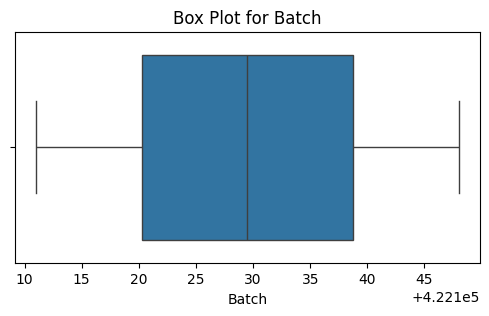

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 5))

for col in numeric_columns.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot for {col}")
    plt.show()

In [44]:
# Save cleaned data
df.to_excel("cleaned_data.xlsx", index=False)
from google.colab import files
files.download("cleaned_data.xlsx")
print("Cleaned dataset saved successfully!")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cleaned dataset saved successfully!


<Figure size 4400x2200 with 0 Axes>

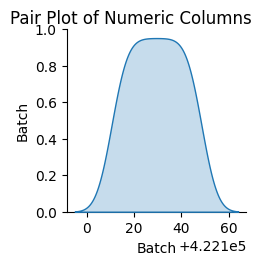

In [65]:
#  Visualization
import pandas as pd
df_cleaned = pd.read_excel("cleaned_data.xlsx")

plt.figure(figsize=(44,22))
sns.pairplot(df_cleaned[num_cols], diag_kind='kde')
plt.suptitle("Pair Plot of Numeric Columns", y=1.02)
plt.show()



<ipython-input-60-7918d0871bf3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned[col], palette='coolwarm')


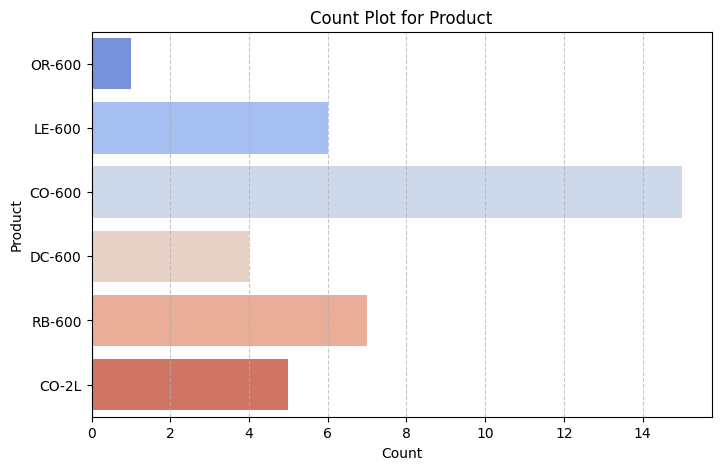

<ipython-input-60-7918d0871bf3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_cleaned[col], palette='coolwarm')


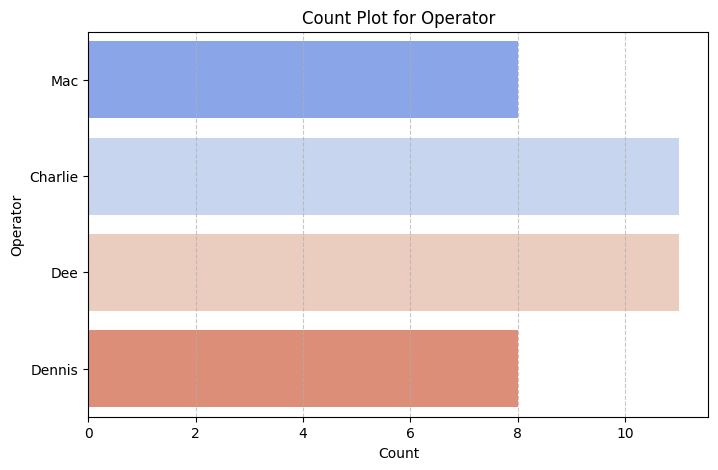

In [60]:
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(y=df_cleaned[col], palette='coolwarm')
    plt.title(f"Count Plot for {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
